| Name  | Surname   | Student No  | Department  |
|---|---|---|---|
| Emin  | Kartci  | S014877  | EE Engineering  |
|Ozan | Yurtsever | S015164 | EE Engineering |
|Yamaç Demirkan| Yılmaz |S018368 |Computer Science|
|Muhammed Ali |Kumaşoğlu| S018505|EE Engineering |



## If you cannot use foluim library, you can still execute the simulation
# If you do not have the libraries INSTALL THEM


In [2]:

!pip3 install foursquare
!pip3 install folium
!pip3 install geopy

     |████████████████████████████████| 94 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 1.1 MB/s eta 0:00:01


In [3]:
# To interact with user use ipywidgets library - Generate a simple GUI
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

# import pandas and json to handle data
import pandas as pd
import json 

# import manuel libraries
from Company import Company
from SimulationLibrary import SimulationEnvironment

# Mapping libraries
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
import pandas as pd
import folium
from folium import plugins



In [4]:
# DEFINE THE IPYWIDGETS

# title - start
programLabel = widgets.Label('-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=widgets.Layout(width='100%'))

# company info
companyName = widgets.Text(description="Comp. Name",value="Example LTD",layout=widgets.Layout(width="50%"))
longitude = widgets.Text(description="Longitude",value="40.730610",layout=widgets.Layout(width="30%"))
latitude = widgets.Text(description="Latitude",value="-73.935242",layout=widgets.Layout(width="30%"))
infoLabel = widgets.Label('------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layout=widgets.Layout(width='100%'))
# break
br1Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# services
servicesLabel = widgets.Label('Select Services:', layout=widgets.Layout(width='100%'))
Dessertbox = widgets.Checkbox(False, description='Dessert')
Saladbox = widgets.Checkbox(False, description='Salad')
Drinkbox = widgets.Checkbox(False, description='Drink')

# break
br2Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# product info - income statement parameters
expectedPriceLabel = widgets.Label('Expected Average Price:', layout=widgets.Layout(width='100%'))
expectedAveragePrice = widgets.IntSlider(min=10, max=100, step=1, description='(Euro): ',value=0)

expectedUnitCostLabel = widgets.Label('Expected Average Unit Cost:', layout=widgets.Layout(width='100%'))
expectedUnitCost = widgets.IntSlider(min=5, max=50, step=1, description='(Euro): ',value=0)

expectedSalesLabel = widgets.Label('Expected Sales Monthly:', layout=widgets.Layout(width='100%'))
expectedSales = widgets.IntSlider(min=5000, max=10000, step=1, description='(Euro): ',value=0)

# company expenses
fixedCostLabel = widgets.Label('Fixed Costs:', layout=widgets.Layout(width='100%'))
fixedCost = widgets.FloatText(value=10000, description='(Euro): ',color = 'blue')

taxRateLabel = widgets.Label('Tax Rate:', layout=widgets.Layout(width='100%'))
taxRate = widgets.FloatSlider(min=5, max=100, step=1, description='%: ',value=0)

# break - finish
br3Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

In [5]:
# This function gets the ipywidget checkboxes and creates a proper list 
# that will be used at the COMPANY Class.

# create a string list bu considering checkbox widgets
def set_service_list():
    
    # create an empty list
    serviceList = []
    
    # if it is checked
    if Dessertbox.value:
        # add to the list
        serviceList.append('Dessert')
    # if it is checked
    if Saladbox.value:
        # add to the list
        serviceList.append('Salad')
    # if it is checked
    if Drinkbox.value:
        # add to the list
        serviceList.append('Drink')
    
    # return the list
    return serviceList

In [6]:
# IMPORTANT 

# Before here you MUST run at leas 1 time to libraries
# and also definition of these objects



# display the widgets that I defined Here  
display(programLabel)

display(companyName)
display(longitude)
display(latitude)
display(infoLabel)
display(br2Label)


display(servicesLabel)
display(Dessertbox)
display(Saladbox)
display(Drinkbox)

display(br2Label)

display(expectedPriceLabel)
display(expectedAveragePrice)

display(expectedUnitCostLabel)
display(expectedUnitCost)

display(expectedSalesLabel)
display(expectedSales)

display(fixedCostLabel)
display(fixedCost)

display(taxRateLabel)
display(taxRate)

display(br3Label)


# HERE PLEASE TYPE YOUR COMPANY'S INFORMATION

Label(value='-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=L…

Text(value='Example LTD', description='Comp. Name', layout=Layout(width='50%'))

Text(value='40.730610', description='Longitude', layout=Layout(width='30%'))

Text(value='-73.935242', description='Latitude', layout=Layout(width='30%'))

Label(value='------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layou…

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Select Services:', layout=Layout(width='100%'))

Checkbox(value=False, description='Dessert')

Checkbox(value=False, description='Salad')

Checkbox(value=False, description='Drink')

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Expected Average Price:', layout=Layout(width='100%'))

IntSlider(value=10, description='(Euro): ', min=10)

Label(value='Expected Average Unit Cost:', layout=Layout(width='100%'))

IntSlider(value=5, description='(Euro): ', max=50, min=5)

Label(value='Expected Sales Monthly:', layout=Layout(width='100%'))

IntSlider(value=5000, description='(Euro): ', max=10000, min=5000)

Label(value='Fixed Costs:', layout=Layout(width='100%'))

FloatText(value=10000.0, description='(Euro): ')

Label(value='Tax Rate:', layout=Layout(width='100%'))

FloatSlider(value=5.0, description='%: ', min=5.0, step=1.0)

Label(value='-------------------------------------------------------------------------------------------------…

In [7]:
# Create the environment and the company
SimEnv = SimulationEnvironment()

# if the location input is too far away ask a new location 
distanceFromCenter = SimEnv.calculate_distance_lon_lat(float(longitude.value),float(latitude.value),40.730610,-73.935242)

# if location is greater then 10000 KM
if distanceFromCenter > 10000:
    # inform the user
    print("Check Your Location:\nLon: {}\nLat: {}\nDistance from center: {}\nSelect it again!! Otherwise your location will be considered as center!!".format(longitude.value,latitude.value,distanceFromCenter))
    # take the center as location 40.74 & -73.94
    company = Company(companyName.value,40.74,-73.94,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
else:
    # create a company object
    company = Company(companyName.value,longitude.value,latitude.value,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
    # print income statement



In [8]:
# Describe the company
company.print_company_description()

# save the company properties as txt file
# company.save_company_description_to()



            Company Name: A-MEAN LTD

            Location:
                - Longitude : 40.730610° N
                - Latitude  : -73.935242° E

            Services:
            
            1 - Dessert
			2 - Salad
			
            
            Average Price      : 56
            Average Unit Cost  : 17

            Sales Volume       : 7839

            Fixed Cost         : 135663.0

            Tax Rate           : 0.18


        


In [9]:
# Show the income statement of the company
company.print_income_statement()

# Save income statement as txt
#company.save_income_statement()



                    ==========  A-MEAN LTD's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 56
                   | Unit Cost     : 17
                   +------------------
                   | Contribution Margin : 39
                   | Sales Volume        : 7839
                   | Revenue             : 438984 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 133263 (Monthly)
                   | Total Fixed Cost    : 135663.0 (Monthly)
                   | Total Cost          : 268926.0
                   +------------------
                   | Gross Margin        : 305721
                   | Taxes               : 55029.78
                   +------------------
                   | NET INCOME          : 250691.22
                   +------------------------------------------------------


        


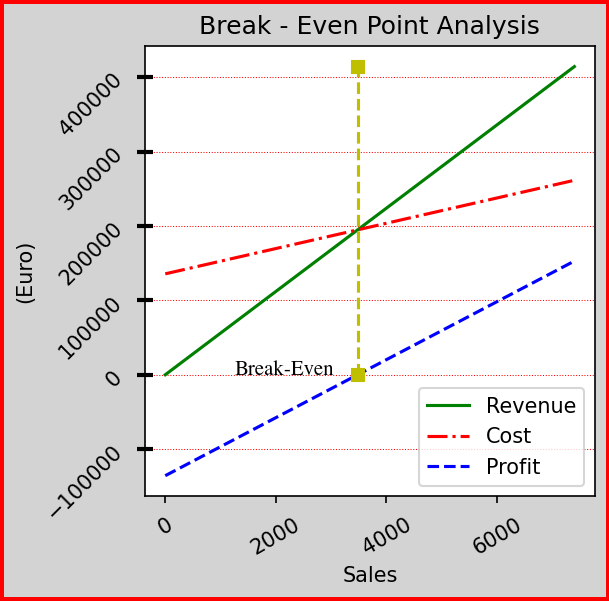

In [10]:
# plot break-even analysis
company.plot_break_even_point()

In [11]:
# CONSIDERING BORROWING OPTIONS

# Future Value

#     You can convert your money to the future value with a defined number of period 
# and certain interest rate


# create GUI objects
PresentValueLabel = widgets.Label('Present Value:', layout=widgets.Layout(width='100%'))
PresentValue = widgets.FloatText(value=1000, description='(Euro): ',continous_update = True)

FutureValueLabel = widgets.Label('Future Value:', layout=widgets.Layout(width='100%'))
FuturetValue = widgets.FloatText(SimEnv.calculate_FV(PresentValue.value,1,0.1), description='(Euro): ',disabled = True)

PeriodValueLabel = widgets.Label('Period Number:', layout=widgets.Layout(width='100%'))
PeriodValue = widgets.FloatText(1, description='Years: ')

RateValueLabel = widgets.Label('Annually Interest Rate:', layout=widgets.Layout(width='100%'))
RateValue = widgets.FloatText(0.10, description='Rate: ')

FV_Calculate_Button = widgets.Button(description="Calculate!")
FV_output = widgets.Output()


# when the button is clicked
def on_button_clicked(b):
    with FV_output:
        # assign new values
        FuturetValue.value = SimEnv.calculate_FV(PresentValue.value,int(PeriodValue.value),float(RateValue.value))

# Display them
display(PresentValueLabel)
display(PresentValue)

display(FutureValueLabel)
display(FuturetValue)

display(PeriodValueLabel)
display(PeriodValue)

display(RateValueLabel)
display(RateValue)


display(FV_Calculate_Button,FV_output)
FV_Calculate_Button.on_click(on_button_clicked)
    
    

Label(value='Present Value:', layout=Layout(width='100%'))

FloatText(value=1000.0, description='(Euro): ')

Label(value='Future Value:', layout=Layout(width='100%'))

FloatText(value=1100.0, description='(Euro): ', disabled=True)

Label(value='Period Number:', layout=Layout(width='100%'))

FloatText(value=1.0, description='Years: ')

Label(value='Annually Interest Rate:', layout=Layout(width='100%'))

FloatText(value=0.1, description='Rate: ')

Button(description='Calculate!', style=ButtonStyle())

Output()

In [12]:
# CONSIDERING BORROWING OPTIONS

# Present Value

#     You can convert your money to the present value with a defined number of period 
# and certain interest rate


# create GUI objects
PresentValueLabel = widgets.Label('Present Value:', layout=widgets.Layout(width='100%'))
PresentValue = widgets.FloatText(SimEnv.calculate_PV(PresentValue.value,int(PeriodValue.value),0.1), description='(Euro): ',continous_update = True,disabled = True)

FutureValueLabel = widgets.Label('Future Value:', layout=widgets.Layout(width='100%'))
FuturetValue = widgets.FloatText(value=1000, description='(Euro): ')

PeriodValueLabel = widgets.Label('Period Number:', layout=widgets.Layout(width='100%'))
PeriodValue = widgets.FloatText(1, description='Years: ')

RateValueLabel = widgets.Label('Annually Interest Rate:', layout=widgets.Layout(width='100%'))
RateValue = widgets.FloatText(0.10, description='Rate: ')

FV_Calculate_Button = widgets.Button(description="Calculate!")
FV_output = widgets.Output()

# when the button is clicked
def on_button_clicked(b):
    with FV_output:
        # assign calculated results
        PresentValue.value = SimEnv.calculate_PV(FuturetValue.value,int(PeriodValue.value),float(RateValue.value))


# display them
display(PresentValueLabel)
display(PresentValue)

display(FutureValueLabel)
display(FuturetValue)

display(PeriodValueLabel)
display(PeriodValue)

display(RateValueLabel)
display(RateValue)


display(FV_Calculate_Button,FV_output)
FV_Calculate_Button.on_click(on_button_clicked)
    
    

Label(value='Present Value:', layout=Layout(width='100%'))

FloatText(value=909.090909090909, description='(Euro): ', disabled=True)

Label(value='Future Value:', layout=Layout(width='100%'))

FloatText(value=1000.0, description='(Euro): ')

Label(value='Period Number:', layout=Layout(width='100%'))

FloatText(value=1.0, description='Years: ')

Label(value='Annually Interest Rate:', layout=Layout(width='100%'))

FloatText(value=0.1, description='Rate: ')

Button(description='Calculate!', style=ButtonStyle())

Output()

In [13]:
# SIMULATION EXECUTIONS

# define constants
tax_rate = 20

# simulation environment is alreadt created as SimEnv but redefine it
SimEnv = SimulationEnvironment(customerCount=10000)



The contribution margin is not a positive number !!
 Contribution Margin : 0


In [14]:
serviceList = ["Desert","Salad","Tea","Dinner","Kebap","Wine","Drink","Ice Cream"]
competitorList = []

#try to get closest 4 competitor companies
try:
    # you can make True if you want to see results
    competitorsPandasForm = SimEnv.get_closest_competitors(float(company.longitude),float( company.latitude),willPrint=False)
    
    # get 4 competitirs
    for index in range(4):
        
        # create object
        competitor = Company(competitorsPandasForm["NAME"][index]      ,competitorsPandasForm["LONGITUDE"][index]   ,competitorsPandasForm["LATITUDE"][index]   ,random.choices(serviceList,k = 3) ,
                              random.randint(10,20)  ,random.randint(5,10)  ,random.randint(10000,30000) ,random.randint(150000,300000),tax_rate)
        
        # append the list
        competitorList.append(competitor)
    
    
#If any problem occurs while reading the objcets
except:
    # you can define your competitors properties manually
                        # NAME              LOCATION   SERVICES         PRICE COST  SALES FIXED COST
    competitor1 = Company("Happy Moon"      ,25,63,["Desert","Salad"]    ,26  ,11  ,44533 ,21333     ,tax_rate)
    competitor2 = Company("Fell Falafel"    ,23,63,["Dinner","Salad"]    ,16  ,13  ,24533 ,23633     ,tax_rate)
    competitor3 = Company("Kartci's Place"  ,21,65,["Desert","Breakfast"],36  ,9   ,64533 ,23343     ,tax_rate)
    competitor4 = Company("Nusret"          ,22,61,["Tea","Dring"]       ,46  ,26  ,77533 ,23233     ,tax_rate)
    
    competitorList.append(competitor1)
    competitorList.append(competitor2)
    competitorList.append(competitor3)
    competitorList.append(competitor4)


# show competitor List
for competitor in competitorList:
    # print description
    competitor.print_company_description()

# print table    
competitorsPandasForm






            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Kebap
			2 - Dinner
			3 - Ice Cream
			
            
            Average Price      : 11
            Average Unit Cost  : 6

            Sales Volume       : 28106

            Fixed Cost         : 179425

            Tax Rate           : 0.2


        


            Company Name: Lower East Side Coffee Shop

            Location:
                - Longitude : -73.98065698318827° N
                - Latitude  : 40.73046806286133° E

            Services:
            
            1 - Kebap
			2 - Ice Cream
			3 - Salad
			
            
            Average Price      : 15
            Average Unit Cost  : 9

            Sales Volume       : 22550

            Fixed Cost         : 235923

            Tax Rate           : 0.2


        


            Company Name: Coffee P

NAME   LATITUDE  LONGITUDE      DISTANCE
0          Allegro Coffee Company  40.716160 -73.959530  18615.165791
1     Lower East Side Coffee Shop  40.730468 -73.980657  18617.199955
2         Coffee Project New York  40.687751 -73.979387  18617.540533
3     Irving Farm Coffee Roasters  40.736716 -73.986817  18617.769966
4  Caffe Vita Coffee Roasting Co.  40.719752 -73.988529  18618.135191

In [15]:
# if you dont define companies the environment creates random companies for you
SimEnv.print_companies()



            Company Name: Main Company

            Location:
                - Longitude : 13° N
                - Latitude  : 14° E

            Services:
            
            1 - drinks
			2 - breakfast
			
            
            Average Price      : 23
            Average Unit Cost  : 17

            Sales Volume       : 2093

            Fixed Cost         : 52780

            Tax Rate           : 0.001


        


            Company Name: Competitor1

            Location:
                - Longitude : 14° N
                - Latitude  : 17° E

            Services:
            
            1 - drinks
			2 - drinks
			
            
            Average Price      : 27
            Average Unit Cost  : 20

            Sales Volume       : 3437

            Fixed Cost         : 79793

            Tax Rate           : 0.0008


        


            Company Name: Competitor2

            Location:
                - Longitude : 19° N
                - Latitude  : 19° E

     

In [16]:
# You can set your companies by providing a company list
SimEnv.define_competitor_companies(competitorList)

# now let see the new companeies
SimEnv.print_companies()



            Company Name: Main Company

            Location:
                - Longitude : 13° N
                - Latitude  : 14° E

            Services:
            
            1 - drinks
			2 - breakfast
			
            
            Average Price      : 23
            Average Unit Cost  : 17

            Sales Volume       : 2093

            Fixed Cost         : 52780

            Tax Rate           : 0.001


        


            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Kebap
			2 - Dinner
			3 - Ice Cream
			
            
            Average Price      : 11
            Average Unit Cost  : 6

            Sales Volume       : 28106

            Fixed Cost         : 179425

            Tax Rate           : 0.2


        


            Company Name: Lower East Side Coffee Shop

            Location:
              

In [17]:
# you can execute the simulation by this function
SimEnv.execute_simulation()

# The log of the simulation will be printed to the console



Company Irving Farm Coffee Roasters is far away from 6985 customer.

Customer 8120 spend 18 tl at Main Company which has a cost 12.419999999999998.

Company Coffee Project New York is far away from 4836 customer.

Company Irving Farm Coffee Roasters is far away from 8624 customer.

Company Irving Farm Coffee Roasters is far away from 6035 customer.

Company Allegro Coffee Company is far away from 9179 customer.

Customer 6228 spend 17 tl at Coffee Project New York which has a cost 7.82.

Company Irving Farm Coffee Roasters is far away from 1243 customer.

Company Lower East Side Coffee Shop is far away from 3285 customer.

Customer 7656 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 4226 customer.

Company Irving Farm Coffee Roasters is far away from 6447 customer.

Company Coffee Project New York is far away from 7179 customer.

Company Irving Farm Coffee Roasters is far away from 8040 customer.

Company Lower East Side Coffee Shop is

Customer 2460 spend 11 tl at Irving Farm Coffee Roasters which has a cost 7.260000000000001.

Company Main Company is far away from 4451 customer.

Company Irving Farm Coffee Roasters is far away from 800 customer.

Company Irving Farm Coffee Roasters is far away from 4783 customer.

Company Coffee Project New York is far away from 9593 customer.

Company Allegro Coffee Company is far away from 6250 customer.

Customer 3949 has not enough budget for Allegro Coffee Company company.

Company Lower East Side Coffee Shop is far away from 8485 customer.

Company Coffee Project New York is far away from 1421 customer.

Company Main Company is far away from 9906 customer.

Company Irving Farm Coffee Roasters is far away from 2936 customer.

Company Lower East Side Coffee Shop is far away from 8193 customer.

Company Main Company is far away from 1237 customer.

Company Coffee Project New York is far away from 4029 customer.

Company Coffee Project New York is far away from 258 customer.

Comp


Company Allegro Coffee Company is far away from 8068 customer.

Company Irving Farm Coffee Roasters is far away from 1954 customer.

Company Main Company is far away from 6755 customer.

Company Lower East Side Coffee Shop is far away from 1088 customer.

Company Lower East Side Coffee Shop is far away from 7798 customer.

Company Lower East Side Coffee Shop is far away from 6989 customer.

Company Allegro Coffee Company is far away from 464 customer.

Company Main Company is far away from 83 customer.

Company Main Company is far away from 511 customer.

Company Irving Farm Coffee Roasters is far away from 295 customer.

Company Irving Farm Coffee Roasters is far away from 9185 customer.

Customer 149 spend 7 tl at Irving Farm Coffee Roasters which has a cost 3.64.

Customer 1134 spend 9 tl at Irving Farm Coffee Roasters which has a cost 3.6.

Company Coffee Project New York is far away from 2427 customer.

Company Coffee Project New York is far away from 6991 customer.

Company Lowe

Company Irving Farm Coffee Roasters is far away from 6493 customer.

Company Coffee Project New York is far away from 8889 customer.

Customer 4172 spend 11 tl at Irving Farm Coffee Roasters which has a cost 4.18.

Company Irving Farm Coffee Roasters is far away from 1032 customer.

Company Lower East Side Coffee Shop is far away from 5708 customer.

Customer 7141 spend 13 tl at Lower East Side Coffee Shop which has a cost 7.93.

Customer 2596 spend 21 tl at Main Company which has a cost 12.18.

Company Main Company is far away from 4383 customer.

Company Allegro Coffee Company is far away from 3024 customer.

Company Irving Farm Coffee Roasters is far away from 7521 customer.

Company Irving Farm Coffee Roasters is far away from 9615 customer.

Company Irving Farm Coffee Roasters is far away from 6051 customer.

Company Allegro Coffee Company is far away from 2215 customer.

Customer 3039 has not enough budget for Main Company company.

Company Lower East Side Coffee Shop is far away


Company Allegro Coffee Company is far away from 3190 customer.

Company Coffee Project New York is far away from 1967 customer.

Company Irving Farm Coffee Roasters is far away from 3361 customer.

Company Coffee Project New York is far away from 8826 customer.

Customer 6930 spend 7 tl at Irving Farm Coffee Roasters which has a cost 3.15.

Customer 9664 spend 12 tl at Coffee Project New York which has a cost 7.4399999999999995.

Company Coffee Project New York is far away from 6742 customer.

Company Coffee Project New York is far away from 8227 customer.

Company Irving Farm Coffee Roasters is far away from 8746 customer.

Company Coffee Project New York is far away from 3357 customer.

Company Main Company is far away from 828 customer.

Company Irving Farm Coffee Roasters is far away from 7949 customer.

Customer 6401 spend 17 tl at Coffee Project New York which has a cost 9.350000000000001.

Company Irving Farm Coffee Roasters is far away from 3075 customer.

Company Irving Farm 


Customer 1832 spend 15 tl at Lower East Side Coffee Shop which has a cost 7.800000000000001.

Company Allegro Coffee Company is far away from 5559 customer.

Company Lower East Side Coffee Shop is far away from 4785 customer.

Company Coffee Project New York is far away from 9 customer.

Company Main Company is far away from 3267 customer.

Company Lower East Side Coffee Shop is far away from 7266 customer.

Company Coffee Project New York is far away from 1518 customer.

Company Allegro Coffee Company is far away from 5491 customer.

Company Coffee Project New York is far away from 3347 customer.

Company Coffee Project New York is far away from 4793 customer.

Company Lower East Side Coffee Shop is far away from 2917 customer.

Company Main Company is far away from 3850 customer.

Company Lower East Side Coffee Shop is far away from 9523 customer.

Company Irving Farm Coffee Roasters is far away from 294 customer.

Company Lower East Side Coffee Shop is far away from 9223 customer.



Company Lower East Side Coffee Shop is far away from 759 customer.

Company Lower East Side Coffee Shop is far away from 899 customer.

Company Coffee Project New York is far away from 4929 customer.

Company Irving Farm Coffee Roasters is far away from 6697 customer.

Customer 6152 spend 15 tl at Coffee Project New York which has a cost 5.25.

Customer 9653 spend 6 tl at Allegro Coffee Company which has a cost 3.3600000000000003.

Company Irving Farm Coffee Roasters is far away from 2661 customer.

Company Lower East Side Coffee Shop is far away from 7721 customer.

Company Lower East Side Coffee Shop is far away from 7148 customer.

Customer 866 has not enough budget for Allegro Coffee Company company.

Company Irving Farm Coffee Roasters is far away from 234 customer.

Company Allegro Coffee Company is far away from 5844 customer.

Company Allegro Coffee Company is far away from 6322 customer.

Company Irving Farm Coffee Roasters is far away from 2273 customer.

Company Main Compan

Company Lower East Side Coffee Shop is far away from 5105 customer.

Company Main Company is far away from 1202 customer.

Company Allegro Coffee Company is far away from 272 customer.

Company Allegro Coffee Company is far away from 483 customer.

Customer 946 spend 20 tl at Main Company which has a cost 7.0.

Company Irving Farm Coffee Roasters is far away from 5059 customer.

Company Lower East Side Coffee Shop is far away from 9805 customer.

Company Coffee Project New York is far away from 8199 customer.

Company Irving Farm Coffee Roasters is far away from 253 customer.

Company Coffee Project New York is far away from 7305 customer.

Company Allegro Coffee Company is far away from 7252 customer.

Company Coffee Project New York is far away from 5579 customer.

Company Allegro Coffee Company is far away from 7537 customer.

Company Irving Farm Coffee Roasters is far away from 4910 customer.

Company Irving Farm Coffee Roasters is far away from 2050 customer.

Company Lower East S

Company Coffee Project New York is far away from 9036 customer.

Customer 8734 spend 16 tl at Lower East Side Coffee Shop which has a cost 5.44.

Company Coffee Project New York is far away from 7346 customer.

Customer 1808 spend 4 tl at Allegro Coffee Company which has a cost 2.32.

Customer 3246 spend 18 tl at Lower East Side Coffee Shop which has a cost 6.66.

Customer 484 spend 14 tl at Coffee Project New York which has a cost 7.5600000000000005.

Company Irving Farm Coffee Roasters is far away from 8499 customer.

Company Lower East Side Coffee Shop is far away from 1863 customer.

Company Irving Farm Coffee Roasters is far away from 7200 customer.

Company Coffee Project New York is far away from 8504 customer.

Company Coffee Project New York is far away from 7716 customer.

Company Main Company is far away from 6443 customer.

Company Main Company is far away from 8857 customer.

Company Lower East Side Coffee Shop is far away from 5329 customer.

Customer 757 spend 11 tl at I

Company Main Company is far away from 7689 customer.

Company Irving Farm Coffee Roasters is far away from 2131 customer.

Customer 3244 spend 25 tl at Main Company which has a cost 13.750000000000002.

Company Coffee Project New York is far away from 556 customer.

Company Main Company is far away from 5021 customer.

Company Main Company is far away from 4458 customer.

Company Coffee Project New York is far away from 9387 customer.

Company Irving Farm Coffee Roasters is far away from 6243 customer.

Company Coffee Project New York is far away from 768 customer.

Company Irving Farm Coffee Roasters is far away from 1594 customer.

Company Coffee Project New York is far away from 4938 customer.

Company Allegro Coffee Company is far away from 2416 customer.

Company Irving Farm Coffee Roasters is far away from 701 customer.

Company Allegro Coffee Company is far away from 9542 customer.

Company Irving Farm Coffee Roasters is far away from 5189 customer.

Company Allegro Coffee Compa


Company Coffee Project New York is far away from 3057 customer.

Company Main Company is far away from 1865 customer.

Company Allegro Coffee Company is far away from 2005 customer.

Customer 2834 spend 9 tl at Allegro Coffee Company which has a cost 5.8500000000000005.

Company Coffee Project New York is far away from 812 customer.

Company Irving Farm Coffee Roasters is far away from 795 customer.

Company Coffee Project New York is far away from 835 customer.

Customer 3971 spend 18 tl at Coffee Project New York which has a cost 11.52.

Company Irving Farm Coffee Roasters is far away from 920 customer.

Company Coffee Project New York is far away from 4055 customer.

Company Lower East Side Coffee Shop is far away from 253 customer.

Company Lower East Side Coffee Shop is far away from 268 customer.

Company Irving Farm Coffee Roasters is far away from 9092 customer.

Company Allegro Coffee Company is far away from 8769 customer.

Customer 3254 spend 7 tl at Irving Farm Coffee Roas

Company Coffee Project New York is far away from 5016 customer.

Company Lower East Side Coffee Shop is far away from 7558 customer.

Customer 8294 spend 16 tl at Lower East Side Coffee Shop which has a cost 5.6.

Customer 6217 spend 13 tl at Lower East Side Coffee Shop which has a cost 7.93.

Company Lower East Side Coffee Shop is far away from 8051 customer.

Customer 2765 spend 13 tl at Lower East Side Coffee Shop which has a cost 8.32.

Customer 6600 spend 16 tl at Main Company which has a cost 8.96.

Company Lower East Side Coffee Shop is far away from 8406 customer.

Customer 2076 spend 11 tl at Allegro Coffee Company which has a cost 6.82.

Company Lower East Side Coffee Shop is far away from 3561 customer.

Company Lower East Side Coffee Shop is far away from 1305 customer.

Company Allegro Coffee Company is far away from 2423 customer.

Company Allegro Coffee Company is far away from 7705 customer.

Company Irving Farm Coffee Roasters is far away from 6284 customer.

Customer 

Customer 3760 spend 10 tl at Allegro Coffee Company which has a cost 6.800000000000001.

Company Coffee Project New York is far away from 8291 customer.

Customer 5438 spend 10 tl at Allegro Coffee Company which has a cost 3.0.

Company Allegro Coffee Company is far away from 6963 customer.

Company Allegro Coffee Company is far away from 5849 customer.

Customer 9135 spend 11 tl at Allegro Coffee Company which has a cost 3.41.

Company Allegro Coffee Company is far away from 1542 customer.

Customer 6616 spend 27 tl at Main Company which has a cost 15.93.

Company Coffee Project New York is far away from 9331 customer.

Company Coffee Project New York is far away from 722 customer.

Company Lower East Side Coffee Shop is far away from 8663 customer.

Company Lower East Side Coffee Shop is far away from 5095 customer.

Company Allegro Coffee Company is far away from 3747 customer.

Company Coffee Project New York is far away from 4679 customer.

Customer 6395 has not enough budget for 

Customer 9252 has not enough budget for Coffee Project New York company.

Company Coffee Project New York is far away from 91 customer.

Customer 9711 has not enough budget for Main Company company.

Company Lower East Side Coffee Shop is far away from 872 customer.

Customer 1530 spend 12 tl at Coffee Project New York which has a cost 6.36.

Company Allegro Coffee Company is far away from 2378 customer.

Company Allegro Coffee Company is far away from 622 customer.

Company Coffee Project New York is far away from 5100 customer.

Company Lower East Side Coffee Shop is far away from 6200 customer.

Company Coffee Project New York is far away from 7710 customer.

Company Coffee Project New York is far away from 4181 customer.

Company Main Company is far away from 1446 customer.

Company Lower East Side Coffee Shop is far away from 3074 customer.

Company Allegro Coffee Company is far away from 2893 customer.

Company Coffee Project New York is far away from 5301 customer.

Company Coff


Company Main Company is far away from 6232 customer.

Company Main Company is far away from 7101 customer.

Company Irving Farm Coffee Roasters is far away from 4042 customer.

Company Allegro Coffee Company is far away from 9151 customer.

Company Coffee Project New York is far away from 8122 customer.

Company Lower East Side Coffee Shop is far away from 8019 customer.

Company Irving Farm Coffee Roasters is far away from 9166 customer.

Company Coffee Project New York is far away from 8036 customer.

Customer 9544 has not enough budget for Irving Farm Coffee Roasters company.

Company Allegro Coffee Company is far away from 2676 customer.

Company Allegro Coffee Company is far away from 8345 customer.

Company Lower East Side Coffee Shop is far away from 8374 customer.

Company Allegro Coffee Company is far away from 678 customer.

Company Irving Farm Coffee Roasters is far away from 1916 customer.

Customer 7706 spend 13 tl at Irving Farm Coffee Roasters which has a cost 6.76.

Co

Company Main Company is far away from 5834 customer.

Company Irving Farm Coffee Roasters is far away from 7328 customer.

Company Allegro Coffee Company is far away from 6582 customer.

Company Main Company is far away from 4477 customer.

Company Irving Farm Coffee Roasters is far away from 8322 customer.

Company Allegro Coffee Company is far away from 3237 customer.

Company Irving Farm Coffee Roasters is far away from 1997 customer.

Company Irving Farm Coffee Roasters is far away from 3009 customer.

Company Allegro Coffee Company is far away from 9598 customer.

Company Irving Farm Coffee Roasters is far away from 2972 customer.

Company Main Company is far away from 4903 customer.

Company Allegro Coffee Company is far away from 5726 customer.

Company Irving Farm Coffee Roasters is far away from 5978 customer.

Company Lower East Side Coffee Shop is far away from 6754 customer.

Company Allegro Coffee Company is far away from 1348 customer.

Company Lower East Side Coffee Shop


Company Coffee Project New York is far away from 2167 customer.

Company Irving Farm Coffee Roasters is far away from 2669 customer.

Company Irving Farm Coffee Roasters is far away from 8330 customer.

Company Main Company is far away from 8299 customer.

Company Coffee Project New York is far away from 7431 customer.

Company Coffee Project New York is far away from 7524 customer.

Company Allegro Coffee Company is far away from 2966 customer.

Company Coffee Project New York is far away from 8858 customer.

Company Main Company is far away from 484 customer.

Company Main Company is far away from 8625 customer.

Company Irving Farm Coffee Roasters is far away from 6457 customer.

Company Lower East Side Coffee Shop is far away from 2725 customer.

Company Coffee Project New York is far away from 5685 customer.

Customer 1062 spend 7 tl at Allegro Coffee Company which has a cost 3.9899999999999998.

Company Lower East Side Coffee Shop is far away from 8489 customer.

Company Coffee 


Customer 3611 spend 12 tl at Irving Farm Coffee Roasters which has a cost 4.68.

Company Lower East Side Coffee Shop is far away from 4629 customer.

Company Lower East Side Coffee Shop is far away from 8936 customer.

Customer 7124 spend 18 tl at Main Company which has a cost 6.3.

Company Coffee Project New York is far away from 9204 customer.

Customer 378 spend 8 tl at Allegro Coffee Company which has a cost 4.56.

Company Allegro Coffee Company is far away from 1719 customer.

Company Lower East Side Coffee Shop is far away from 4484 customer.

Company Irving Farm Coffee Roasters is far away from 7207 customer.

Company Coffee Project New York is far away from 4869 customer.

Company Main Company is far away from 708 customer.

Company Lower East Side Coffee Shop is far away from 2129 customer.

Customer 566 spend 13 tl at Irving Farm Coffee Roasters which has a cost 7.8.

Company Irving Farm Coffee Roasters is far away from 3136 customer.

Company Allegro Coffee Company is far a


Company Main Company is far away from 9393 customer.

Company Irving Farm Coffee Roasters is far away from 6427 customer.

Customer 4270 spend 10 tl at Allegro Coffee Company which has a cost 6.5.

Company Lower East Side Coffee Shop is far away from 7925 customer.

Company Main Company is far away from 6649 customer.

Customer 2940 spend 16 tl at Main Company which has a cost 5.92.

Company Main Company is far away from 4066 customer.

Company Irving Farm Coffee Roasters is far away from 3812 customer.

Company Lower East Side Coffee Shop is far away from 8164 customer.

Company Lower East Side Coffee Shop is far away from 2846 customer.

Company Irving Farm Coffee Roasters is far away from 4725 customer.

Company Lower East Side Coffee Shop is far away from 4092 customer.

Customer 7744 spend 13 tl at Allegro Coffee Company which has a cost 5.8500000000000005.

Company Lower East Side Coffee Shop is far away from 7793 customer.

Company Main Company is far away from 2044 customer.



Company Irving Farm Coffee Roasters is far away from 6698 customer.

Company Main Company is far away from 6533 customer.

Company Irving Farm Coffee Roasters is far away from 5592 customer.

Company Irving Farm Coffee Roasters is far away from 4785 customer.

Company Lower East Side Coffee Shop is far away from 1559 customer.

Company Coffee Project New York is far away from 8067 customer.

Company Lower East Side Coffee Shop is far away from 9919 customer.

Company Coffee Project New York is far away from 3741 customer.

Customer 202 spend 16 tl at Lower East Side Coffee Shop which has a cost 10.4.

Company Lower East Side Coffee Shop is far away from 3277 customer.

Customer 7197 spend 10 tl at Lower East Side Coffee Shop which has a cost 5.6000000000000005.

Customer 6706 has not enough budget for Main Company company.

Company Coffee Project New York is far away from 9743 customer.

Customer 8917 has not enough budget for Coffee Project New York company.

Company Allegro Coffee Co

Company Coffee Project New York is far away from 4397 customer.

Company Irving Farm Coffee Roasters is far away from 5375 customer.

Company Allegro Coffee Company is far away from 9980 customer.

Company Allegro Coffee Company is far away from 3578 customer.

Company Main Company is far away from 399 customer.

Company Irving Farm Coffee Roasters is far away from 8504 customer.

Company Lower East Side Coffee Shop is far away from 6093 customer.

Company Coffee Project New York is far away from 4334 customer.

Company Main Company is far away from 2435 customer.

Company Lower East Side Coffee Shop is far away from 1161 customer.

Customer 268 spend 24 tl at Main Company which has a cost 15.36.

Company Coffee Project New York is far away from 2114 customer.

Customer 3707 spend 12 tl at Lower East Side Coffee Shop which has a cost 4.4399999999999995.

Company Lower East Side Coffee Shop is far away from 696 customer.

Company Main Company is far away from 9987 customer.

Company All

In [18]:
# You can get simulation resutls with this function
SimEnv.calculate_simulation_results()

# Provided values of the simulation:

    # PROFIT
    # Average Price
    # Averate Cost
    # Contribution Margin
    # Sales Volume
    
    # FOR EACH COMPANY




Company: Main Company 	PROFIT: 12545.44 	Avg Price: 20.85	 Avg Cost: 10.47	 Contribution Margin: 10.38	 Sales Vol: 1499

Company: Allegro Coffee Company 	PROFIT: 112424.00 	Avg Price: 9.95	 Avg Cost: 4.93	 Contribution Margin: 5.01	 Sales Vol: 840

Company: Lower East Side Coffee Shop 	PROFIT: 108240.00 	Avg Price: 13.78	 Avg Cost: 6.79	 Contribution Margin: 6.99	 Sales Vol: 843

Company: Coffee Project New York 	PROFIT: 94790.40 	Avg Price: 14.73	 Avg Cost: 7.33	 Contribution Margin: 7.40	 Sales Vol: 901

Company: Irving Farm Coffee Roasters 	PROFIT: 32940.80 	Avg Price: 9.95	 Avg Cost: 5.08	 Contribution Margin: 4.87	 Sales Vol: 857


In [17]:
# You can get and save simulation log as txt file to analyse the simulation later with another programs
SimEnv.report_simulation_log(willPrint=True)




Company Allegro Coffee Company is far away from 6821 customer.

Company Irving Farm Coffee Roasters is far away from 8708 customer.

Company Irving Farm Coffee Roasters is far away from 459 customer.

Company Coffee Project New York is far away from 650 customer.

Customer 6257 spend 9 tl at Coffee Project New York which has a cost 4.68.

Company Allegro Coffee Company is far away from 8297 customer.

Company Coffee Project New York is far away from 2253 customer.

Company Lower East Side Coffee Shop is far away from 6631 customer.

Company Allegro Coffee Company is far away from 4451 customer.

Company Coffee Project New York is far away from 4115 customer.

Company Main Company is far away from 3719 customer.

Company Lower East Side Coffee Shop is far away from 2120 customer.

Company Irving Farm Coffee Roasters is far away from 5692 customer.

Customer 1933 spend 12 tl at Irving Farm Coffee Roasters which has a cost 4.08.

Company Coffee Project New York is far away from 6747 cust


Company Coffee Project New York is far away from 9563 customer.

Company Irving Farm Coffee Roasters is far away from 8796 customer.

Company Irving Farm Coffee Roasters is far away from 3040 customer.

Company Allegro Coffee Company is far away from 9718 customer.

Company Main Company is far away from 6066 customer.

Company Coffee Project New York is far away from 128 customer.

Company Irving Farm Coffee Roasters is far away from 6506 customer.

Company Main Company is far away from 6351 customer.

Company Main Company is far away from 6550 customer.

Company Lower East Side Coffee Shop is far away from 4318 customer.

Customer 243 spend 9 tl at Allegro Coffee Company which has a cost 6.12.

Company Coffee Project New York is far away from 6195 customer.

Customer 7701 spend 16 tl at Lower East Side Coffee Shop which has a cost 7.04.

Company Allegro Coffee Company is far away from 4539 customer.

Company Irving Farm Coffee Roasters is far away from 2991 customer.

Company Lower E

Customer 9345 spend 9 tl at Coffee Project New York which has a cost 4.68.

Customer 5301 spend 30 tl at Main Company which has a cost 19.2.

Company Coffee Project New York is far away from 9098 customer.

Company Allegro Coffee Company is far away from 7892 customer.

Company Coffee Project New York is far away from 2117 customer.

Company Coffee Project New York is far away from 5202 customer.

Company Allegro Coffee Company is far away from 4739 customer.

Company Lower East Side Coffee Shop is far away from 7907 customer.

Company Allegro Coffee Company is far away from 8659 customer.

Company Coffee Project New York is far away from 9692 customer.

Company Irving Farm Coffee Roasters is far away from 9720 customer.

Company Irving Farm Coffee Roasters is far away from 5066 customer.

Company Irving Farm Coffee Roasters is far away from 834 customer.

Company Lower East Side Coffee Shop is far away from 4967 customer.

Company Allegro Coffee Company is far away from 9435 customer.


Company Allegro Coffee Company is far away from 3175 customer.

Company Coffee Project New York is far away from 4132 customer.

Company Lower East Side Coffee Shop is far away from 2006 customer.

Company Main Company is far away from 7882 customer.

Company Coffee Project New York is far away from 709 customer.

Company Lower East Side Coffee Shop is far away from 6004 customer.

Company Main Company is far away from 2903 customer.

Company Lower East Side Coffee Shop is far away from 1895 customer.

Company Main Company is far away from 8020 customer.

Company Irving Farm Coffee Roasters is far away from 8696 customer.

Company Coffee Project New York is far away from 8631 customer.

Company Allegro Coffee Company is far away from 452 customer.

Company Allegro Coffee Company is far away from 3002 customer.

Company Lower East Side Coffee Shop is far away from 9639 customer.

Company Allegro Coffee Company is far away from 2717 customer.

Company Irving Farm Coffee Roasters is far 

Company Main Company is far away from 8917 customer.

Company Allegro Coffee Company is far away from 789 customer.

Company Irving Farm Coffee Roasters is far away from 3292 customer.

Company Coffee Project New York is far away from 8266 customer.

Company Irving Farm Coffee Roasters is far away from 7109 customer.

Company Allegro Coffee Company is far away from 6596 customer.

Customer 4185 spend 17 tl at Main Company which has a cost 10.37.

Company Main Company is far away from 5500 customer.

Company Irving Farm Coffee Roasters is far away from 3561 customer.

Company Main Company is far away from 8885 customer.

Company Coffee Project New York is far away from 1585 customer.

Company Irving Farm Coffee Roasters is far away from 113 customer.

Company Allegro Coffee Company is far away from 1767 customer.

Company Irving Farm Coffee Roasters is far away from 5925 customer.

Company Lower East Side Coffee Shop is far away from 4079 customer.

Company Irving Farm Coffee Roasters i


Company Main Company is far away from 7866 customer.

Company Irving Farm Coffee Roasters is far away from 5250 customer.

Customer 6412 spend 10 tl at Coffee Project New York which has a cost 4.9.

Company Irving Farm Coffee Roasters is far away from 7522 customer.

Company Coffee Project New York is far away from 8345 customer.

Company Coffee Project New York is far away from 651 customer.

Company Main Company is far away from 6300 customer.

Customer 7944 spend 16 tl at Lower East Side Coffee Shop which has a cost 8.16.

Company Lower East Side Coffee Shop is far away from 2237 customer.

Customer 4150 spend 14 tl at Irving Farm Coffee Roasters which has a cost 6.44.

Company Irving Farm Coffee Roasters is far away from 4446 customer.

Company Allegro Coffee Company is far away from 2240 customer.

Company Lower East Side Coffee Shop is far away from 7745 customer.

Company Coffee Project New York is far away from 7828 customer.

Company Coffee Project New York is far away from 2

Company Allegro Coffee Company is far away from 4999 customer.

Company Allegro Coffee Company is far away from 1513 customer.

Company Main Company is far away from 455 customer.

Company Coffee Project New York is far away from 123 customer.

Customer 4777 spend 19 tl at Lower East Side Coffee Shop which has a cost 11.78.

Company Irving Farm Coffee Roasters is far away from 3000 customer.

Company Main Company is far away from 5367 customer.

Company Main Company is far away from 4488 customer.

Customer 1565 spend 18 tl at Irving Farm Coffee Roasters which has a cost 11.52.

Company Lower East Side Coffee Shop is far away from 6163 customer.

Company Main Company is far away from 4839 customer.

Company Allegro Coffee Company is far away from 55 customer.

Company Allegro Coffee Company is far away from 5476 customer.

Company Coffee Project New York is far away from 1291 customer.

Customer 1464 spend 16 tl at Lower East Side Coffee Shop which has a cost 10.56.

Customer 8983 spen


Company Irving Farm Coffee Roasters is far away from 3955 customer.

Customer 4007 spend 14 tl at Irving Farm Coffee Roasters which has a cost 5.18.

Company Lower East Side Coffee Shop is far away from 294 customer.

Company Coffee Project New York is far away from 7242 customer.

Company Irving Farm Coffee Roasters is far away from 6024 customer.

Company Main Company is far away from 4529 customer.

Company Allegro Coffee Company is far away from 5377 customer.

Customer 9621 spend 11 tl at Irving Farm Coffee Roasters which has a cost 7.59.

Company Main Company is far away from 7355 customer.

Company Allegro Coffee Company is far away from 768 customer.

Customer 926 spend 15 tl at Coffee Project New York which has a cost 10.05.

Company Main Company is far away from 7310 customer.

Company Coffee Project New York is far away from 5342 customer.

Company Main Company is far away from 285 customer.

Company Main Company is far away from 1551 customer.

Company Lower East Side Coff

Company Allegro Coffee Company is far away from 928 customer.

Company Irving Farm Coffee Roasters is far away from 5917 customer.

Customer 6374 spend 19 tl at Irving Farm Coffee Roasters which has a cost 8.93.

Company Irving Farm Coffee Roasters is far away from 2766 customer.

Company Main Company is far away from 8589 customer.

Company Coffee Project New York is far away from 1856 customer.

Company Allegro Coffee Company is far away from 8462 customer.

Company Main Company is far away from 777 customer.

Company Coffee Project New York is far away from 29 customer.

Customer 5444 spend 18 tl at Irving Farm Coffee Roasters which has a cost 5.58.

Company Coffee Project New York is far away from 5062 customer.

Company Coffee Project New York is far away from 8020 customer.

Company Main Company is far away from 6982 customer.

Company Allegro Coffee Company is far away from 1309 customer.

Company Coffee Project New York is far away from 6497 customer.

Company Coffee Project Ne

Company Lower East Side Coffee Shop is far away from 5919 customer.

Customer 2326 spend 12 tl at Lower East Side Coffee Shop which has a cost 4.32.

Company Lower East Side Coffee Shop is far away from 2823 customer.

Company Coffee Project New York is far away from 4187 customer.

Customer 159 spend 6 tl at Allegro Coffee Company which has a cost 1.8599999999999999.

Company Coffee Project New York is far away from 930 customer.

Company Irving Farm Coffee Roasters is far away from 1251 customer.

Company Lower East Side Coffee Shop is far away from 6935 customer.

Company Lower East Side Coffee Shop is far away from 6954 customer.

Company Irving Farm Coffee Roasters is far away from 2302 customer.

Customer 7198 spend 22 tl at Main Company which has a cost 8.14.

Company Main Company is far away from 9190 customer.

Company Allegro Coffee Company is far away from 8477 customer.

Company Coffee Project New York is far away from 3702 customer.

Company Main Company is far away from 8

Company Allegro Coffee Company is far away from 6644 customer.

Company Irving Farm Coffee Roasters is far away from 4417 customer.

Company Coffee Project New York is far away from 5695 customer.

Company Lower East Side Coffee Shop is far away from 7317 customer.

Company Allegro Coffee Company is far away from 5968 customer.

Company Irving Farm Coffee Roasters is far away from 4429 customer.

Company Irving Farm Coffee Roasters is far away from 8786 customer.

Company Lower East Side Coffee Shop is far away from 8705 customer.

Company Lower East Side Coffee Shop is far away from 8421 customer.

Customer 9912 spend 19 tl at Main Company which has a cost 5.89.

Company Main Company is far away from 7131 customer.

Company Main Company is far away from 2670 customer.

Company Allegro Coffee Company is far away from 868 customer.

Company Irving Farm Coffee Roasters is far away from 4047 customer.

Company Irving Farm Coffee Roasters is far away from 6455 customer.

Company Lower East

Customer 211 spend 8 tl at Allegro Coffee Company which has a cost 5.12.

Company Allegro Coffee Company is far away from 4853 customer.

Company Irving Farm Coffee Roasters is far away from 4233 customer.

Customer 2138 spend 17 tl at Lower East Side Coffee Shop which has a cost 9.69.

Customer 9525 spend 25 tl at Main Company which has a cost 10.75.

Company Allegro Coffee Company is far away from 2469 customer.

Customer 6573 has not enough budget for Irving Farm Coffee Roasters company.

Company Coffee Project New York is far away from 8090 customer.

Company Coffee Project New York is far away from 3986 customer.

Company Main Company is far away from 6810 customer.

Company Coffee Project New York is far away from 2688 customer.

Company Allegro Coffee Company is far away from 8143 customer.

Company Irving Farm Coffee Roasters is far away from 8355 customer.

Company Coffee Project New York is far away from 2012 customer.

Company Lower East Side Coffee Shop is far away from 130

Company Allegro Coffee Company is far away from 280 customer.

Company Main Company is far away from 5006 customer.

Company Main Company is far away from 5336 customer.

Company Lower East Side Coffee Shop is far away from 7400 customer.

Company Lower East Side Coffee Shop is far away from 3141 customer.

Company Lower East Side Coffee Shop is far away from 8066 customer.

Company Allegro Coffee Company is far away from 2480 customer.

Company Irving Farm Coffee Roasters is far away from 5872 customer.

Company Allegro Coffee Company is far away from 4393 customer.

Company Irving Farm Coffee Roasters is far away from 8337 customer.

Company Irving Farm Coffee Roasters is far away from 5464 customer.

Company Allegro Coffee Company is far away from 6244 customer.

Company Allegro Coffee Company is far away from 4852 customer.

Customer 8077 spend 13 tl at Coffee Project New York which has a cost 5.72.

Customer 222 spend 9 tl at Allegro Coffee Company which has a cost 5.22.

Company 


Company Lower East Side Coffee Shop is far away from 7159 customer.

Company Coffee Project New York is far away from 3679 customer.

Company Irving Farm Coffee Roasters is far away from 7121 customer.

Company Lower East Side Coffee Shop is far away from 3416 customer.

Company Main Company is far away from 1763 customer.

Company Lower East Side Coffee Shop is far away from 5571 customer.

Customer 7013 spend 9 tl at Coffee Project New York which has a cost 2.88.

Company Main Company is far away from 4051 customer.

Company Coffee Project New York is far away from 7582 customer.

Company Allegro Coffee Company is far away from 9221 customer.

Customer 4423 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 5644 customer.

Company Coffee Project New York is far away from 8202 customer.

Company Irving Farm Coffee Roasters is far away from 8776 customer.

Company Irving Farm Coffee Roasters is far away from 815 customer.

Company Allegro 


Company Irving Farm Coffee Roasters is far away from 132 customer.

Company Coffee Project New York is far away from 9706 customer.

Customer 1534 spend 9 tl at Allegro Coffee Company which has a cost 4.7700000000000005.

Customer 432 has not enough budget for Lower East Side Coffee Shop company.

Company Lower East Side Coffee Shop is far away from 4396 customer.

Company Coffee Project New York is far away from 3432 customer.

Customer 458 spend 11 tl at Allegro Coffee Company which has a cost 3.8499999999999996.

Company Lower East Side Coffee Shop is far away from 8909 customer.

Company Lower East Side Coffee Shop is far away from 6491 customer.

Company Irving Farm Coffee Roasters is far away from 5901 customer.

Company Main Company is far away from 1058 customer.

Customer 6000 spend 13 tl at Lower East Side Coffee Shop which has a cost 8.71.

Company Lower East Side Coffee Shop is far away from 9635 customer.

Company Main Company is far away from 3952 customer.

Company Main


Company Main Company is far away from 5474 customer.

Company Coffee Project New York is far away from 6853 customer.

Company Allegro Coffee Company is far away from 6713 customer.

Company Coffee Project New York is far away from 2531 customer.

Company Main Company is far away from 4072 customer.

Customer 6849 spend 7 tl at Allegro Coffee Company which has a cost 2.8000000000000003.

Company Lower East Side Coffee Shop is far away from 2386 customer.

Company Coffee Project New York is far away from 5443 customer.

Company Coffee Project New York is far away from 2923 customer.

Company Allegro Coffee Company is far away from 9424 customer.

Customer 9131 has not enough budget for Main Company company.

Company Main Company is far away from 2030 customer.

Company Irving Farm Coffee Roasters is far away from 2613 customer.

Company Lower East Side Coffee Shop is far away from 665 customer.

Company Lower East Side Coffee Shop is far away from 4187 customer.

Customer 372 spend 10 

Company Coffee Project New York is far away from 1976 customer.

Company Allegro Coffee Company is far away from 6125 customer.

Company Main Company is far away from 8828 customer.

Company Irving Farm Coffee Roasters is far away from 3011 customer.

Company Main Company is far away from 9932 customer.

Company Main Company is far away from 7462 customer.

Company Irving Farm Coffee Roasters is far away from 1606 customer.

Company Irving Farm Coffee Roasters is far away from 8586 customer.

Company Allegro Coffee Company is far away from 5333 customer.

Company Allegro Coffee Company is far away from 9183 customer.

Company Coffee Project New York is far away from 5263 customer.

Company Lower East Side Coffee Shop is far away from 7580 customer.

Company Irving Farm Coffee Roasters is far away from 9405 customer.

Company Coffee Project New York is far away from 2673 customer.

Company Coffee Project New York is far away from 7777 customer.

Company Irving Farm Coffee Roasters is fa


Company Irving Farm Coffee Roasters is far away from 8895 customer.

Company Coffee Project New York is far away from 134 customer.

Company Coffee Project New York is far away from 7064 customer.

Company Irving Farm Coffee Roasters is far away from 7329 customer.

Company Main Company is far away from 5646 customer.

Company Allegro Coffee Company is far away from 9909 customer.

Customer 7636 spend 19 tl at Irving Farm Coffee Roasters which has a cost 5.7.

Company Coffee Project New York is far away from 8294 customer.

Customer 7429 spend 14 tl at Coffee Project New York which has a cost 5.739999999999999.

Company Coffee Project New York is far away from 6807 customer.

Company Allegro Coffee Company is far away from 3353 customer.

Company Irving Farm Coffee Roasters is far away from 519 customer.

Company Main Company is far away from 6521 customer.

Company Coffee Project New York is far away from 8022 customer.

Company Coffee Project New York is far away from 4492 customer.

Company Main Company is far away from 7699 customer.

Company Irving Farm Coffee Roasters is far away from 5893 customer.

Company Allegro Coffee Company is far away from 8099 customer.

Customer 7470 spend 9 tl at Coffee Project New York which has a cost 4.7700000000000005.

Company Irving Farm Coffee Roasters is far away from 9225 customer.

Company Lower East Side Coffee Shop is far away from 8982 customer.

Company Lower East Side Coffee Shop is far away from 8527 customer.

Company Coffee Project New York is far away from 1075 customer.

Company Irving Farm Coffee Roasters is far away from 6611 customer.

Customer 9296 has not enough budget for Main Company company.

Company Irving Farm Coffee Roasters is far away from 7674 customer.

Company Irving Farm Coffee Roasters is far away from 5260 customer.

Company Coffee Project New York is far away from 2511 customer.

Company Lower East Side Coffee Shop is far away from 6730 customer.

Company Lower East Side Coffee Shop is far away


Company Main Company is far away from 2507 customer.

Company Main Company is far away from 7988 customer.

Company Allegro Coffee Company is far away from 3710 customer.

Company Lower East Side Coffee Shop is far away from 6500 customer.

Company Coffee Project New York is far away from 4657 customer.

Company Coffee Project New York is far away from 6012 customer.

Company Main Company is far away from 3060 customer.

Company Coffee Project New York is far away from 2863 customer.

Company Main Company is far away from 2008 customer.

Company Irving Farm Coffee Roasters is far away from 2330 customer.

Company Irving Farm Coffee Roasters is far away from 5775 customer.

Company Coffee Project New York is far away from 1144 customer.

Customer 2942 has not enough budget for Irving Farm Coffee Roasters company.

Company Allegro Coffee Company is far away from 8773 customer.

Customer 446 spend 11 tl at Allegro Coffee Company which has a cost 5.61.

Company Lower East Side Coffee Shop

Company Lower East Side Coffee Shop is far away from 3178 customer.

Company Coffee Project New York is far away from 7078 customer.

Company Main Company is far away from 8503 customer.

Customer 4257 spend 15 tl at Coffee Project New York which has a cost 8.25.

Company Allegro Coffee Company is far away from 2416 customer.

Company Coffee Project New York is far away from 8457 customer.

Company Coffee Project New York is far away from 4449 customer.

Customer 7581 spend 9 tl at Allegro Coffee Company which has a cost 6.12.

Company Irving Farm Coffee Roasters is far away from 613 customer.

Company Coffee Project New York is far away from 9769 customer.

Company Irving Farm Coffee Roasters is far away from 7050 customer.

Company Allegro Coffee Company is far away from 6436 customer.

Company Coffee Project New York is far away from 4715 customer.

Customer 1565 spend 21 tl at Main Company which has a cost 13.860000000000001.

Company Irving Farm Coffee Roasters is far away from 36


Company Lower East Side Coffee Shop is far away from 2055 customer.

Company Irving Farm Coffee Roasters is far away from 2868 customer.

Company Lower East Side Coffee Shop is far away from 6887 customer.

Company Allegro Coffee Company is far away from 318 customer.

Company Allegro Coffee Company is far away from 2874 customer.

Company Allegro Coffee Company is far away from 8668 customer.

Company Irving Farm Coffee Roasters is far away from 1902 customer.

Company Main Company is far away from 2102 customer.

Company Coffee Project New York is far away from 9372 customer.

Customer 7049 has not enough budget for Irving Farm Coffee Roasters company.

Company Lower East Side Coffee Shop is far away from 9466 customer.

Company Allegro Coffee Company is far away from 2317 customer.

Company Main Company is far away from 294 customer.

Company Irving Farm Coffee Roasters is far away from 7607 customer.

Company Allegro Coffee Company is far away from 7883 customer.

Company Coffee P

Customer 8439 spend 18 tl at Main Company which has a cost 6.3.

Company Irving Farm Coffee Roasters is far away from 4979 customer.

Company Lower East Side Coffee Shop is far away from 9651 customer.

Company Allegro Coffee Company is far away from 9677 customer.

Company Coffee Project New York is far away from 6997 customer.

Company Main Company is far away from 2932 customer.

Customer 48 spend 10 tl at Coffee Project New York which has a cost 3.4000000000000004.

Company Irving Farm Coffee Roasters is far away from 3549 customer.

Company Coffee Project New York is far away from 9904 customer.

Company Lower East Side Coffee Shop is far away from 5341 customer.

Customer 4300 spend 14 tl at Coffee Project New York which has a cost 4.760000000000001.

Customer 7495 spend 12 tl at Allegro Coffee Company which has a cost 4.5600000000000005.

Company Allegro Coffee Company is far away from 1310 customer.

Company Lower East Side Coffee Shop is far away from 4881 customer.

Company A


Company Main Company is far away from 730 customer.

Customer 3153 spend 9 tl at Allegro Coffee Company which has a cost 3.5100000000000002.

Company Irving Farm Coffee Roasters is far away from 257 customer.

Company Allegro Coffee Company is far away from 6401 customer.

Company Main Company is far away from 220 customer.

Company Lower East Side Coffee Shop is far away from 186 customer.

Customer 5895 spend 10 tl at Allegro Coffee Company which has a cost 4.3.

Company Coffee Project New York is far away from 4804 customer.

Company Allegro Coffee Company is far away from 9944 customer.

Company Irving Farm Coffee Roasters is far away from 2663 customer.

Company Allegro Coffee Company is far away from 5371 customer.

Company Coffee Project New York is far away from 7072 customer.

Company Coffee Project New York is far away from 9197 customer.

Customer 9177 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 4473 customer.

Company Co


Customer 156 spend 12 tl at Coffee Project New York which has a cost 8.16.

Company Lower East Side Coffee Shop is far away from 1257 customer.

Company Irving Farm Coffee Roasters is far away from 7637 customer.

Customer 8401 spend 12 tl at Lower East Side Coffee Shop which has a cost 3.84.

Company Allegro Coffee Company is far away from 3054 customer.

Company Lower East Side Coffee Shop is far away from 8917 customer.

Company Lower East Side Coffee Shop is far away from 4856 customer.

Company Main Company is far away from 5521 customer.

Company Main Company is far away from 5771 customer.

Company Lower East Side Coffee Shop is far away from 1502 customer.

Company Coffee Project New York is far away from 5074 customer.

Company Allegro Coffee Company is far away from 9159 customer.

Customer 361 spend 9 tl at Coffee Project New York which has a cost 3.2399999999999998.

Company Lower East Side Coffee Shop is far away from 2965 customer.

Customer 8366 has not enough budget fo


Company Irving Farm Coffee Roasters is far away from 8904 customer.

Company Main Company is far away from 8904 customer.

Company Main Company is far away from 2639 customer.

Company Coffee Project New York is far away from 3255 customer.

Customer 1851 spend 29 tl at Main Company which has a cost 19.43.

Customer 2779 spend 28 tl at Main Company which has a cost 15.959999999999999.

Company Main Company is far away from 2719 customer.

Customer 6340 spend 13 tl at Irving Farm Coffee Roasters which has a cost 6.5.

Company Coffee Project New York is far away from 2398 customer.

Customer 4036 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.2.

Customer 9999 spend 30 tl at Main Company which has a cost 17.099999999999998.

Company Coffee Project New York is far away from 1486 customer.

Company Lower East Side Coffee Shop is far away from 9424 customer.

Company Lower East Side Coffee Shop is far away from 8992 customer.

Company Irving Farm Coffee Roasters is far away 

Company Lower East Side Coffee Shop is far away from 1276 customer.

Company Main Company is far away from 2794 customer.

Company Irving Farm Coffee Roasters is far away from 1848 customer.

Company Allegro Coffee Company is far away from 3423 customer.

Company Coffee Project New York is far away from 4680 customer.

Company Lower East Side Coffee Shop is far away from 5411 customer.

Company Main Company is far away from 9550 customer.

Company Irving Farm Coffee Roasters is far away from 7895 customer.

Company Coffee Project New York is far away from 2420 customer.

Company Lower East Side Coffee Shop is far away from 3392 customer.

Company Irving Farm Coffee Roasters is far away from 2086 customer.

Customer 4282 spend 11 tl at Allegro Coffee Company which has a cost 5.39.

Customer 8307 spend 13 tl at Lower East Side Coffee Shop which has a cost 7.67.

Company Coffee Project New York is far away from 1238 customer.

Company Main Company is far away from 5129 customer.

Company 


Company Lower East Side Coffee Shop is far away from 7830 customer.

Company Main Company is far away from 5987 customer.

Company Main Company is far away from 6424 customer.

Company Main Company is far away from 7835 customer.

Company Lower East Side Coffee Shop is far away from 5155 customer.

Customer 393 spend 8 tl at Allegro Coffee Company which has a cost 5.6.

Company Irving Farm Coffee Roasters is far away from 8599 customer.

Company Main Company is far away from 8427 customer.

Company Main Company is far away from 4003 customer.

Customer 5372 spend 12 tl at Irving Farm Coffee Roasters which has a cost 5.64.

Company Irving Farm Coffee Roasters is far away from 3297 customer.

Company Irving Farm Coffee Roasters is far away from 1618 customer.

Company Main Company is far away from 8742 customer.

Company Allegro Coffee Company is far away from 3131 customer.

Customer 4495 spend 29 tl at Main Company which has a cost 10.149999999999999.

Company Allegro Coffee Company i

Company Allegro Coffee Company is far away from 5777 customer.

Company Allegro Coffee Company is far away from 2176 customer.

Company Irving Farm Coffee Roasters is far away from 6237 customer.

Company Allegro Coffee Company is far away from 8869 customer.

Company Irving Farm Coffee Roasters is far away from 4079 customer.

Customer 5589 spend 17 tl at Main Company which has a cost 6.97.

Company Lower East Side Coffee Shop is far away from 542 customer.

Company Irving Farm Coffee Roasters is far away from 7456 customer.

Company Coffee Project New York is far away from 1800 customer.

Company Irving Farm Coffee Roasters is far away from 4373 customer.

Company Irving Farm Coffee Roasters is far away from 7643 customer.

Company Coffee Project New York is far away from 8019 customer.

Company Allegro Coffee Company is far away from 3900 customer.

Company Irving Farm Coffee Roasters is far away from 1720 customer.

Company Main Company is far away from 157 customer.

Company Lower


Company Irving Farm Coffee Roasters is far away from 8677 customer.

Customer 1851 spend 23 tl at Main Company which has a cost 11.73.

Company Lower East Side Coffee Shop is far away from 4571 customer.

Customer 5685 spend 15 tl at Coffee Project New York which has a cost 6.9.

Company Lower East Side Coffee Shop is far away from 2565 customer.

Company Allegro Coffee Company is far away from 3297 customer.

Customer 7470 spend 7 tl at Allegro Coffee Company which has a cost 3.5700000000000003.

Company Lower East Side Coffee Shop is far away from 4544 customer.

Company Allegro Coffee Company is far away from 3967 customer.

Company Coffee Project New York is far away from 1546 customer.

Company Lower East Side Coffee Shop is far away from 4711 customer.

Customer 7419 spend 12 tl at Lower East Side Coffee Shop which has a cost 4.68.

Company Lower East Side Coffee Shop is far away from 2922 customer.

Company Irving Farm Coffee Roasters is far away from 4111 customer.

Company Lo

Company Coffee Project New York is far away from 5821 customer.

Company Allegro Coffee Company is far away from 7641 customer.

Company Main Company is far away from 7447 customer.

Company Irving Farm Coffee Roasters is far away from 8131 customer.

Company Allegro Coffee Company is far away from 1320 customer.

Customer 4198 spend 7 tl at Allegro Coffee Company which has a cost 4.13.

Customer 6548 spend 26 tl at Main Company which has a cost 16.38.

Customer 1523 has not enough budget for Irving Farm Coffee Roasters company.

Company Irving Farm Coffee Roasters is far away from 3284 customer.

Company Lower East Side Coffee Shop is far away from 1376 customer.

Company Coffee Project New York is far away from 4088 customer.

Company Main Company is far away from 4013 customer.

Company Main Company is far away from 6267 customer.

Company Main Company is far away from 4065 customer.

Company Coffee Project New York is far away from 5253 customer.

Company Main Company is far away f


Company Irving Farm Coffee Roasters is far away from 5344 customer.

Company Irving Farm Coffee Roasters is far away from 2936 customer.

Company Allegro Coffee Company is far away from 5430 customer.

Company Allegro Coffee Company is far away from 220 customer.

Company Irving Farm Coffee Roasters is far away from 7453 customer.

Company Lower East Side Coffee Shop is far away from 6764 customer.

Company Irving Farm Coffee Roasters is far away from 7269 customer.

Company Irving Farm Coffee Roasters is far away from 7302 customer.

Company Irving Farm Coffee Roasters is far away from 2724 customer.

Customer 2428 spend 10 tl at Allegro Coffee Company which has a cost 3.1.

Company Allegro Coffee Company is far away from 596 customer.

Company Allegro Coffee Company is far away from 8433 customer.

Company Allegro Coffee Company is far away from 52 customer.

Company Lower East Side Coffee Shop is far away from 4898 customer.

Company Main Company is far away from 7080 customer.

Cu

Company Lower East Side Coffee Shop is far away from 7828 customer.

Company Allegro Coffee Company is far away from 8195 customer.

Company Lower East Side Coffee Shop is far away from 8892 customer.

Customer 7944 spend 13 tl at Lower East Side Coffee Shop which has a cost 5.2.

Company Allegro Coffee Company is far away from 9384 customer.

Customer 9761 spend 8 tl at Allegro Coffee Company which has a cost 3.6.

Company Coffee Project New York is far away from 625 customer.

Company Irving Farm Coffee Roasters is far away from 4880 customer.

Company Lower East Side Coffee Shop is far away from 4224 customer.

Customer 6088 has not enough budget for Coffee Project New York company.

Customer 2570 has not enough budget for Main Company company.

Customer 7066 spend 7 tl at Allegro Coffee Company which has a cost 2.8699999999999997.

Company Coffee Project New York is far away from 5074 customer.

Company Coffee Project New York is far away from 8545 customer.

Company Allegro Coffee


Company Irving Farm Coffee Roasters is far away from 9274 customer.

Customer 7995 spend 15 tl at Irving Farm Coffee Roasters which has a cost 8.4.

Company Irving Farm Coffee Roasters is far away from 8942 customer.

Company Coffee Project New York is far away from 4367 customer.

Customer 8207 spend 19 tl at Lower East Side Coffee Shop which has a cost 9.5.

Company Irving Farm Coffee Roasters is far away from 6560 customer.

Company Main Company is far away from 1641 customer.

Company Lower East Side Coffee Shop is far away from 6858 customer.

Company Coffee Project New York is far away from 7408 customer.

Customer 9002 has not enough budget for Lower East Side Coffee Shop company.

Company Coffee Project New York is far away from 9121 customer.

Customer 2560 spend 16 tl at Irving Farm Coffee Roasters which has a cost 6.08.

Customer 432 spend 10 tl at Allegro Coffee Company which has a cost 6.5.

Company Main Company is far away from 2377 customer.

Company Lower East Side Cof

Company Coffee Project New York is far away from 8306 customer.

Company Irving Farm Coffee Roasters is far away from 7400 customer.

Customer 9042 spend 10 tl at Allegro Coffee Company which has a cost 5.2.

Company Lower East Side Coffee Shop is far away from 6901 customer.

Company Coffee Project New York is far away from 59 customer.

Company Main Company is far away from 302 customer.

Company Coffee Project New York is far away from 7259 customer.

Customer 5595 spend 27 tl at Main Company which has a cost 13.77.

Company Allegro Coffee Company is far away from 1719 customer.

Company Coffee Project New York is far away from 9010 customer.

Company Irving Farm Coffee Roasters is far away from 8935 customer.

Company Main Company is far away from 5176 customer.

Company Irving Farm Coffee Roasters is far away from 8729 customer.

Company Lower East Side Coffee Shop is far away from 7906 customer.

Company Coffee Project New York is far away from 7381 customer.

Company Main Compan


Customer 4810 spend 20 tl at Main Company which has a cost 13.4.

Customer 9189 spend 11 tl at Coffee Project New York which has a cost 5.94.

Company Coffee Project New York is far away from 487 customer.

Company Irving Farm Coffee Roasters is far away from 265 customer.

Company Main Company is far away from 5200 customer.

Company Allegro Coffee Company is far away from 2590 customer.

Company Irving Farm Coffee Roasters is far away from 7852 customer.

Company Lower East Side Coffee Shop is far away from 5584 customer.

Company Main Company is far away from 5919 customer.

Company Irving Farm Coffee Roasters is far away from 4576 customer.

Company Irving Farm Coffee Roasters is far away from 6895 customer.

Company Main Company is far away from 2317 customer.

Company Coffee Project New York is far away from 4447 customer.

Customer 6023 has not enough budget for Coffee Project New York company.

Company Coffee Project New York is far away from 7263 customer.

Company Coffee Pro


Company Lower East Side Coffee Shop is far away from 4145 customer.

Company Main Company is far away from 7904 customer.

Company Allegro Coffee Company is far away from 9914 customer.

Company Allegro Coffee Company is far away from 9693 customer.

Company Irving Farm Coffee Roasters is far away from 3574 customer.

Company Allegro Coffee Company is far away from 3774 customer.

Company Irving Farm Coffee Roasters is far away from 3586 customer.

Company Irving Farm Coffee Roasters is far away from 1126 customer.

Company Main Company is far away from 9871 customer.

Company Coffee Project New York is far away from 6819 customer.

Customer 6841 spend 12 tl at Coffee Project New York which has a cost 3.84.

Company Lower East Side Coffee Shop is far away from 3683 customer.

Company Allegro Coffee Company is far away from 3194 customer.

Company Allegro Coffee Company is far away from 3296 customer.

Customer 2080 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.62.

Cus


The log file is successfully created as simulation_log_report.txt


In [19]:
# You can save the simulation summary as txt file
SimEnv.report_simulation_summary(willPrint = True)

# THIS FILE WILL BE USED AT MAP FILE !!
# IMPORTANT



Company: Main Company 	PROFIT: 12545.44 	Avg Price: 20.85	 Avg Cost: 10.47	 Contribution Margin: 10.38	 Sales Vol: 1499 



Company: Allegro Coffee Company 	PROFIT: 112424.00 	Avg Price: 9.95	 Avg Cost: 4.93	 Contribution Margin: 5.01	 Sales Vol: 840 



Company: Lower East Side Coffee Shop 	PROFIT: 108240.00 	Avg Price: 13.78	 Avg Cost: 6.79	 Contribution Margin: 6.99	 Sales Vol: 843 



Company: Coffee Project New York 	PROFIT: 94790.40 	Avg Price: 14.73	 Avg Cost: 7.33	 Contribution Margin: 7.40	 Sales Vol: 901 



Company: Irving Farm Coffee Roasters 	PROFIT: 32940.80 	Avg Price: 9.95	 Avg Cost: 5.08	 Contribution Margin: 4.87	 Sales Vol: 857 


Simulation Summary file submitted successfully!!


In [22]:
SimEnv.save_competitor_income_statements(willPrint = True)

Allegro Coffee Company income statement is successfully saved!


                    ==========  Allegro Coffee Company's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 9.543922984356197
                   | Unit Cost     : 4.7647412755716
                   +------------------
                   | Contribution Margin : 4.779181708784597
                   | Sales Volume        : 831
                   | Revenue             : 184510 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 147608 (Monthly)
                   | Total Fixed Cost    : 276203 (Monthly)
                   | Total Cost          : 423811
                   +------------------
                   | Gross Margin        : 36902
                   | Taxes               : 7380.400000000001
                   +------------------
                   | NET INCOME          : 29521.6
   